<a href="https://colab.research.google.com/github/Mahabubjamil/ColabNotebook/blob/main/EDA__%26_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flight price predection EDA + Feature** **engineering**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_train = pd.read_excel("Data_Train.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df_test = pd.read_excel("Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
df_final = df_train.append(df_test)

<ipython-input-4-4d586eef1866>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_train.append(df_test)


In [ ]:
df_final.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


Feature Engineering process

In [ ]:
df_final['Date']=df_final['Date_of_Journey'].str.split('/').str[0]
df_final['Month']=df_final['Date_of_Journey'].str.split('/').str[1]
df_final['Year']=df_final['Date_of_Journey'].str.split('/').str[2]

In [ ]:
df_final.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [ ]:
#df_final['Date']=df_final['Date_of_Journey'].apply(lambda x:x.split('/')[0])
#df_final['Month']=df_final['Date_of_Journey'].apply(lambda x:x.split('/')[1])
#df_final['Year']=df_final['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [ ]:
df_final['Date'] = df_final['Date'].astype(np.int64)
df_final['Month'] = df_final['Month'].astype(np.int64)
df_final['Year'] = df_final['Year'].astype(np.int64)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [ ]:
#df_final[['Date','Month','Year']] = df_final[['Date','Month','Year']].astype(int)

In [ ]:
df_final = df_final.drop('Date_of_Journey',axis=1)

In [ ]:
df_final.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year'],
      dtype='object')

In [ ]:
df_final['Arrival_Time'] = df_final["Arrival_Time"].str.split(' ').str[0]

In [ ]:
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [ ]:
#df_final['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [ ]:
df_final.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [ ]:
[features for features in df_final.columns if df_final[features].isnull().sum()>0]

['Route', 'Total_Stops', 'Price']

<Axes: >

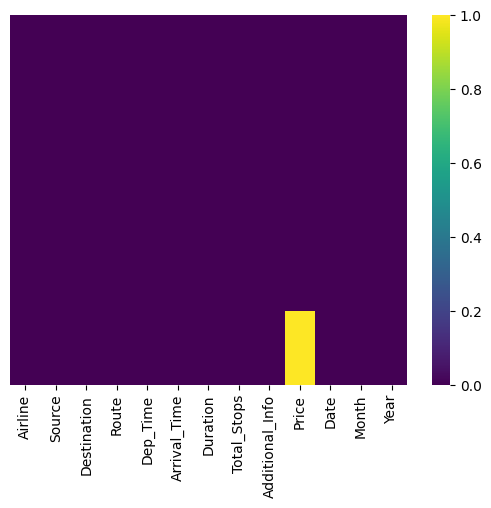

In [ ]:
sns.heatmap(df_final.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
df_final['Route'].info()

<class 'pandas.core.series.Series'>
Int64Index: 13354 entries, 0 to 2670
Series name: Route
Non-Null Count  Dtype 
--------------  ----- 
13353 non-null  object
dtypes: object(1)
memory usage: 208.7+ KB


In [ ]:
df_final['Arrival_Hour'] = df_final['Arrival_Time'].apply(lambda x:x.split(':')[0])
df_final['Arrival_Min'] = df_final['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [ ]:
df_final.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year', 'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

In [ ]:
df_final['Arrival_Hour'] = df_final['Arrival_Hour'].astype(int)
df_final['Arrival_Min'] = df_final['Arrival_Min'].astype(int)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_Hour     13354 non-null  int64  
 14  Arrival_Min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
df_final.drop('Arrival_Time',axis = 1,inplace=True)

In [ ]:
df_final.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

In [ ]:
df_final['Dep_hour'] = df_final['Dep_Time'].apply(lambda x:x.split(':')[0])
df_final['Dep_min'] = df_final['Dep_Time'].str.split(':').str[1]

In [ ]:
df_final['Dep_hour'] = df_final['Dep_hour'].astype(int)
df_final['Dep_min'] = df_final['Dep_min'].astype(int)

In [ ]:
df_final.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [ ]:
df_final.drop('Dep_Time', axis=1,inplace=True)
df_final.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Min', 'Dep_hour', 'Dep_min'],
      dtype='object')

In [ ]:
df_final['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
df_final['Total_Stops'] = df_final['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [ ]:
df_final.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25


In [ ]:
df_final.drop('Route',axis=1,inplace=True)

In [ ]:
df_final.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
df_final['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df_final['duration_hour'] = df_final['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [ ]:
df_final.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7


In [ ]:
df_final.columns


Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Min', 'Dep_hour', 'Dep_min', 'duration_hour'],
      dtype='object')

In [ ]:
#df_final['duration_hour'] = df_final['duration_hour'].astype(int)

In [ ]:
df_final[df_final['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [ ]:
df_final.drop(6474,axis=0,inplace=True)
df_final.drop(2660,axis=0,inplace=True)

In [ ]:
df_final[df_final['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,duration_hour


In [ ]:
#df_final['duration_hour'] = df_final['duration_hour'].astype('int')

In [ ]:
df_final['duration_min'] = df_final['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [ ]:
df_final['duration_min'].head(5)

0     50
1     25
2    NaN
3     25
4     45
Name: duration_min, dtype: object

In [ ]:
df_final['duration_min'].isnull().sum()

1283

In [ ]:
df_final['duration_min'].fillna(df_final['duration_min'].mode(),inplace=True)

In [ ]:
df_final[df_final['duration_min']=='NaN']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,duration_hour,duration_min


In [ ]:
type(df_final['duration_min'])

pandas.core.series.Series

In [ ]:
df_final['duration_min'].isnull().sum()

1283

In [ ]:
df_final['duration_hour'].fillna(df_final['duration_hour'].mode(),inplace=True)

In [ ]:
df_final['duration_hour'].isnull().sum()

1283

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int64  
 8   Month            13351 non-null  int64  
 9   Year             13351 non-null  int64  
 10  Arrival_Hour     13351 non-null  int64  
 11  Arrival_Min      13351 non-null  int64  
 12  Dep_hour         13351 non-null  int64  
 13  Dep_min          13351 non-null  int64  
 14  duration_hour    12068 non-null  object 
 15  duration_min     12068 non-null  object 
dtypes: float64(2), int64(7), object(7)
memory usage: 1.7+ MB


In [ ]:
#df_final['duration_min'] = df_final['duration_min'].astype('int')

In [ ]:
df_final.drop('Duration',axis=1,inplace= True)

In [ ]:
df_final.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,50,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,25,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,NaN,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,25,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,45,45


In [ ]:
df_final['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_final['Airline'] = le.fit_transform(df_final['Airline'])

In [ ]:
df_final['Source'] = le.fit_transform(df_final['Source'])

In [ ]:
df_final['Destination'] = le.fit_transform(df_final['Destination'])

In [ ]:
df_final['Additional_Info'] = le.fit_transform(df_final['Additional_Info'])

In [ ]:
df_final.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,duration_hour,duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,50,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,25,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,NaN,NaN
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,25,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,45,45
